In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [28]:
df = yf.download(tickers='BTC-USD', period='1y', interval='1h')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-12-06 21:00:00+00:00,19185.683594,19249.027344,19152.695312,19249.027344,19249.027344,0
2020-12-06 22:00:00+00:00,19250.443359,19255.943359,19093.824219,19158.894531,19158.894531,399732736
2020-12-06 23:00:00+00:00,19156.314453,19390.500000,19156.314453,19338.730469,19338.730469,1085126656
2020-12-07 00:00:00+00:00,19343.128906,19411.828125,19339.962891,19344.941406,19344.941406,0
2020-12-07 01:00:00+00:00,19344.232422,19344.232422,19262.052734,19298.404297,19298.404297,0


In [12]:
df['sma_small'] = df['Close'].rolling(window=10).mean()
df['sma_large'] = df['Close'].rolling(window=30).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,sma_small,sma_large
2021-12-06 17:00:00+00:00,49168.429688,49262.671875,48978.390625,49035.167969,49035.167969,210644992,48394.979297,48762.654948
2021-12-06 18:00:00+00:00,49048.367188,49256.625000,48860.242188,49253.226562,49253.226562,320708608,48493.447656,48758.587500
2021-12-06 19:00:00+00:00,49232.617188,49425.457031,49126.609375,49207.535156,49207.535156,252575744,48672.152344,48752.954818
2021-12-06 20:00:00+00:00,49166.386719,49204.468750,49092.816406,49125.773438,49125.773438,49225728,48829.515625,48755.331641
2021-12-06 20:22:02+00:00,49116.023438,49116.023438,49116.023438,49116.023438,49116.023438,0,48878.697656,48793.940495


In [15]:
df['sma_split'] = df['sma_small'] - df['sma_large']
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,sma_small,sma_large,sma_split
2020-12-08 01:00:00+00:00,19233.804688,19234.937500,19168.757812,19220.753906,19220.753906,0,19121.974414,19208.130729,-86.156315
2020-12-08 02:00:00+00:00,19221.361328,19221.361328,19175.042969,19187.113281,19187.113281,0,19119.108984,19208.157161,-89.048177
2020-12-08 03:00:00+00:00,19187.396484,19193.222656,19153.187500,19179.007812,19179.007812,119615488,19120.408203,19205.823177,-85.414974
2020-12-08 04:00:00+00:00,19176.603516,19210.234375,19166.437500,19179.994141,19179.994141,0,19142.712109,19206.526497,-63.814388
2020-12-08 05:00:00+00:00,19179.730469,19218.458984,19179.730469,19218.458984,19218.458984,110198784,19166.026758,19202.517448,-36.490690


In [71]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'


<AxesSubplot:title={'center':'BTC/USD | 42 & 252 days SMAs'}>

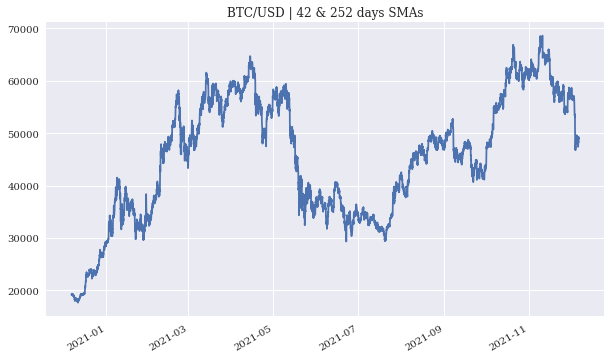

In [76]:
df['SMA1'] = df['Close'].rolling(42).mean()
df['SMA2'] = df['Close'].rolling(252).mean()

df['Close'].plot(title='BTC/USD | 42 & 252 days SMAs', figsize=(10,6))

<AxesSubplot:title={'center':'Market Positioning'}>

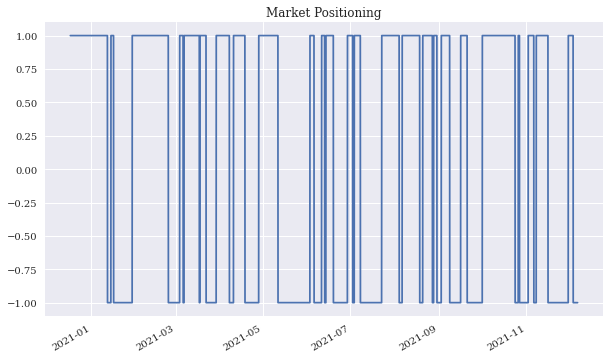

In [77]:
df['position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)
df.dropna(inplace=True)
df['position'].plot(ylim=[-1.1, 1.1],
                    title='Market Positioning',
                    figsize=(10,6))

<AxesSubplot:>

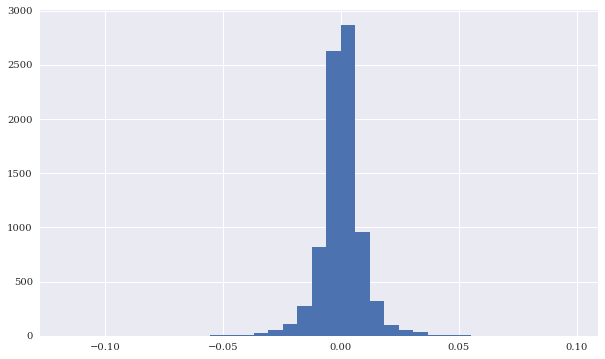

In [78]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['returns'].hist(bins=35, figsize=(10,6))

<AxesSubplot:>

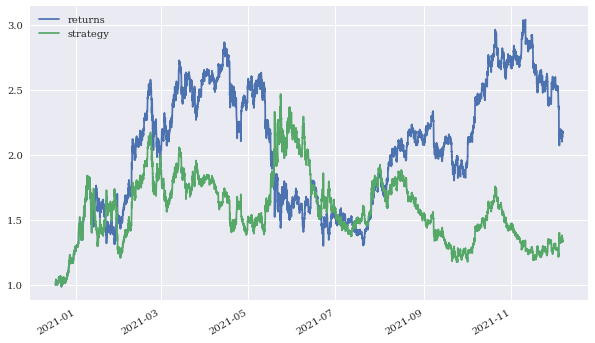

In [80]:
df['strategy'] = df['position'].shift(1) * df['returns']
df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))